<a href="https://colab.research.google.com/github/Ekliipce/ResumAI/blob/main/notebooks/Resume_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resume text clasification

## 1. 🔍 Analyse des données

In [1]:
from datasets import load_dataset

resume_dataset = load_dataset("ganchengguang/resume_seven_class")
resume_dataset = resume_dataset["train"]
resume_dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/528 [00:00<?, ?B/s]

resume.txt: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/78670 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 78670
})

In [2]:
import random

for i in range(10):
  rand = random.randint(0, len(resume_dataset))
  print(resume_dataset[rand]['text'])

PI	Date of Birth : 15/09/1995
Sum	· Communicative, self-motivated and innovative thinker, consistently pursuing new challenges.
Exp	Roles & Responsibilities:
Edu	COMPUTER ENGINEERING
Exp	Involved in Analysis, Design, and Implementation of software applications using Java, J2EE, XML and XSLT, React JS and Web Services (REST)
Exp	 1 Year ‘O’ Level Diploma from Doeacc Society Delhi in 2005
Exp	Verizon- Atlanta, GA – August 2015 to February 2016
Exp	Technology Tools  PL SQL  UNIX  Java  j2ee
Exp	· Maintaining Daily, Weekly, Monthly reports for all the recruiters to evaluate / monitor their performance/progress.
Exp	Developed Views, Joins, Procedures, and Functions using PL/SQL & SQL to transform and structure data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

resume_dataset_df = pd.DataFrame(resume_dataset)
resume_dataset_df.head()

,text
0,Exp\tName: Abiral Pandey
1,PI\tEmail:
2,PI\tPhone: 940-242-3303
3,"PI\tCurrent Location: Woonsocket, Rhode Island"
4,PI\tVisa Status: US Citizen


In [4]:
resume_dataset_df["label"] = resume_dataset_df["text"].astype(str)
resume_dataset_df["label"] = resume_dataset_df["label"].apply(lambda x: x.split("\t")[0])
resume_dataset_df.head()

,text,label
0,Exp\tName: Abiral Pandey,Exp
1,PI\tEmail:,PI
2,PI\tPhone: 940-242-3303,PI
3,"PI\tCurrent Location: Woonsocket, Rhode Island",PI
4,PI\tVisa Status: US Citizen,PI


In [5]:
def get_text(cls_text):
  text_split = cls_text.split("\t")

  if len(text_split) > 1:
    return text_split[1]
  else:
    return cls_text

resume_dataset_df["text"] = resume_dataset_df["text"].apply(lambda x: get_text(x))
resume_dataset_df.head()

,text,label
0,Name: Abiral Pandey,Exp
1,Email:,PI
2,Phone: 940-242-3303,PI
3,"Current Location: Woonsocket, Rhode Island",PI
4,Visa Status: US Citizen,PI


In [6]:
nbr_classes = list(resume_dataset_df["label"].unique())
nbr_classes

['Exp', 'PI', 'Sum', 'Skill', 'Edu', 'Obj', 'QC', '']

label
Exp      41158
PI       13293
Edu       9495
Sum       6542
Skill     4974
Obj       2230
QC         977
             1
Name: count, dtype: int64


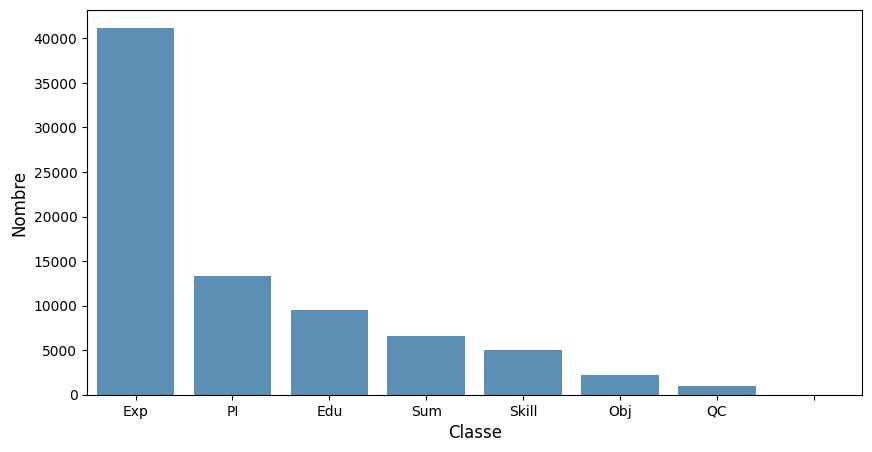

In [7]:
count_classes = resume_dataset_df["label"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_classes.index, y=count_classes.values, alpha=0.8)
plt.ylabel('Nombre', fontsize=12)
plt.xlabel('Classe', fontsize=12)

print(count_classes)

label
Exp      41158
PI       13293
Edu       9495
Sum       6542
Skill     4974
Obj       2230
QC         977
Name: count, dtype: int64


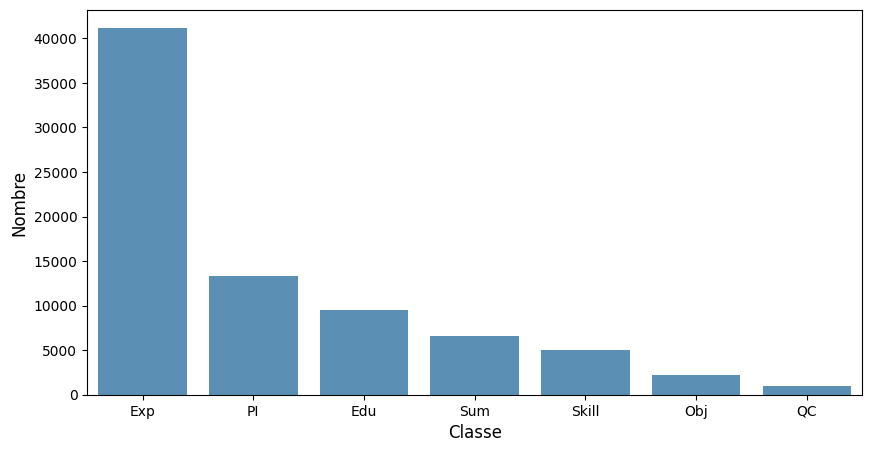

In [8]:
resume_dataset_df = resume_dataset_df[resume_dataset_df["label"] != ""]
count_classes = resume_dataset_df["label"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_classes.index, y=count_classes.values, alpha=0.8)
plt.ylabel('Nombre', fontsize=12)
plt.xlabel('Classe', fontsize=12)

print(count_classes)

In [9]:
def get_dateset_per_label(label):
  return resume_dataset_df[resume_dataset_df["label"] == label]

print("Classe 1 : ", nbr_classes[0])
get_dateset_per_label(nbr_classes[0])

Classe 1 :  Exp


,text,label
0,Name: Abiral Pandey,Exp
50,Responsibilities:,Exp
51,Involved in various stages of Software Develop...,Exp
52,Used AWS Cloud platform and its features which...,Exp
53,"Expertise in building rich, interactive user i...",Exp
...,...,...
78651," Sampling Techniques: SRSWR/WOR, PPSWR/WOR, S...",Exp
78652,"Machine Learning: Decision tree, Random forest...",Exp
78653,"segmentation, KNN, etc.",Exp
78654,Deep Learning: Knowledge of Deep Learning tech...,Exp


In [10]:
print("Classe 2 : ", nbr_classes[1])
get_dateset_per_label(nbr_classes[1])

Classe 2 :  PI


,text,label
1,Email:,PI
2,Phone: 940-242-3303,PI
3,"Current Location: Woonsocket, Rhode Island",PI
4,Visa Status: US Citizen,PI
153,Achyuth,PI
...,...,...
78665, Passport No. : R3966226,PI
78666," Present Address : #32, Prasiddhi, 4th Cross,...",PI
78667," Permanent Address : AT-Gopalpur, PO-Patapur,...",PI
78668, Notice Period : 1 Month,PI


In [11]:
print("Classe 3 : ", nbr_classes[2])
get_dateset_per_label(nbr_classes[2])

Classe 3 :  Sum


,text,label
5,SUMMARY:,Sum
6,Dynamic individual with 6 years of software de...,Sum
7,Exposure to all phases of Software Development...,Sum
8,Designed and developed web UI screen using Ang...,Sum
9,"Developed AngularJS Controllers, Services, fil...",Sum
...,...,...
78575," Statistician, Zafin, Bangalore, Nov 2017 – P...",Sum
78576," Associate Statistician, Zafin, Bangalore, Ja...",Sum
78577," Senior Research Fellow, IASRI, New Delhi, No...",Sum
78620,AWARDS,Sum


In [12]:
print("Classe 4 : ", nbr_classes[3])
get_dateset_per_label(nbr_classes[3])

Classe 4 :  Skill


,text,label
29,TECHNICAL SKILLS:,Skill
30,"Programming Languages: Java/J2EE, PL/SQL, Unix...",Skill
31,"Java/J2EE Technologies: JavaBeans, collections...",Skill
32,"Frameworks: Struts 1.x/2.x, Spring 2.5/3.0, We...",Skill
33,"Methodologies/Design Patterns: OOAD, OOP, UML,...",Skill
...,...,...
78618,TRAINING,Skill
78656,Software Skill,Skill
78657," Statistical Packages: R, SAS, SPSS",Skill
78658," Other Languages: Python, SQL",Skill


In [13]:
print("Classe 5 : ", nbr_classes[4])
get_dateset_per_label(nbr_classes[4])

Classe 5 :  Edu


,text,label
151,Education:,Edu
152,Bachelor of Computer Science – University of N...,Edu
348,Education:Bachelors in Applied Sciences and En...,Edu
926,EDUCATIONAL DOCUMENTS,Edu
927,MASTERS IN COMPUTER SCIENCE.,Edu
...,...,...
78623,EDUCATION,Edu
78641," Masters of Science, Agricultural Statistics ...",Edu
78643,"Major: Agricultural Statistics, Minor: Compute...",Edu
78644," Bachelor of Science, Agriculture (Aug, 2007 ...",Edu


In [14]:
print("Classe 6 : ", nbr_classes[5])
get_dateset_per_label(nbr_classes[5])

Classe 6 :  Obj


,text,label
156,OBJECTIVE:,Obj
157,Around 8 years of strong software experience i...,Obj
11847,Objective:,Obj
11848,To work in the most challenging position with ...,Obj
14327,OBJECTIVE,Obj
...,...,...
78478,CAREER OBJECTIVE:,Obj
78479,To secure a position in the field of System an...,Obj
78503,OBJECTIVE:,Obj
78504,� Continuously enhance my skills and knowledge...,Obj


In [15]:
print("Classe 7 : ", nbr_classes[6])
get_dateset_per_label(nbr_classes[6])

Classe 7 :  QC


,text,label
971,CERTIFICATION:,QC
972,Project Management Professional (PMP) – Projec...,QC
973,PMP Number: 1693785,QC
974,PMP Expiration Date: February 6th 2020,QC
1667,Certifications and Tools:,QC
...,...,...
78451,· Cisco certified Network Associate (CCNA ),QC
78452,· Cisco certified Network Professional (CCNP) ...,QC
78453,· Certified Ethical Hacker(CEH) Trained,QC
78619,CERTIFICATIONS,QC


In [16]:
resume_dataset_df["labels_code"] = resume_dataset_df["label"].apply(
      lambda x: nbr_classes.index(x)
)

resume_dataset_df.loc[:10, ["labels_code", "label"]]

,labels_code,label
0,0,Exp
1,1,PI
2,1,PI
3,1,PI
4,1,PI
5,2,Sum
6,2,Sum
7,2,Sum
8,2,Sum
9,2,Sum


## 2. 🧼 Prétraitement des données (Preprocessing)

In [17]:
!pip install -q emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.3 MB/s eta 0:00:00


In [18]:
import pandas as pd
import re
import emoji
from bs4 import BeautifulSoup

def clean_text(text):
    text = str(text)
    text = re.sub(r'[\n\r\t]+', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = text.strip()
    text = emoji.replace_emoji(text, replace='')
    text = BeautifulSoup(text, "html.parser").get_text()
    return text

resume_dataset_df["text"] = resume_dataset_df["text"].apply(clean_text)
resume_dataset_df = resume_dataset_df.drop_duplicates(subset=["text"])

/tmp/ipython-input-3095231379.py:12: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()


In [19]:
resume_dataset_df

,text,label,labels_code
0,Name: Abiral Pandey,Exp,0
1,Email:,PI,1
2,Phone: 940-242-3303,PI,1
3,"Current Location: Woonsocket, Rhode Island",PI,1
4,Visa Status: US Citizen,PI,1
...,...,...,...
78665, Passport No. : R3966226,PI,1
78666," Present Address : #32, Prasiddhi, 4th Cross,...",PI,1
78667," Permanent Address : AT-Gopalpur, PO-Patapur,...",PI,1
78668, Notice Period : 1 Month,PI,1


## 3. Construction du Dataloader

In [20]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

texts = resume_dataset_df["text"].tolist()
encodings = tokenizer(
    texts,
    truncation=True,
    padding="max_length",
    max_length=512,
    return_tensors="pt"
)

# 3. Ajouter les tenseurs dans le DataFrame
resume_dataset_df["input_ids"] = encodings["input_ids"].tolist()
resume_dataset_df["attention_mask"] = encodings["attention_mask"].tolist()
if "token_type_ids" in encodings:
    resume_dataset_df["token_type_ids"] = encodings["token_type_ids"].tolist()


resume_dataset_df.head(10)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

,text,label,labels_code,input_ids,attention_mask,token_type_ids
0,Name: Abiral Pandey,Exp,0,"[101, 2171, 1024, 11113, 7895, 2140, 6090, 320...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Email:,PI,1,"[101, 10373, 1024, 102, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Phone: 940-242-3303,PI,1,"[101, 3042, 1024, 6365, 2692, 1011, 22431, 101...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"Current Location: Woonsocket, Rhode Island",PI,1,"[101, 2783, 3295, 1024, 15854, 3619, 7432, 338...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Visa Status: US Citizen,PI,1,"[101, 9425, 3570, 1024, 2149, 6926, 102, 0, 0,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,SUMMARY:,Sum,2,"[101, 12654, 1024, 102, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Dynamic individual with 6 years of software de...,Sum,2,"[101, 8790, 3265, 2007, 1020, 2086, 1997, 4007...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Exposure to all phases of Software Development...,Sum,2,"[101, 7524, 2000, 2035, 12335, 1997, 4007, 245...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,Designed and developed web UI screen using Ang...,Sum,2,"[101, 2881, 1998, 2764, 4773, 21318, 3898, 247...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"Developed AngularJS Controllers, Services, fil...",Sum,2,"[101, 2764, 16108, 22578, 21257, 1010, 2578, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
from torch.utils.data import Dataset
import torch

class ResumeDataset(Dataset):
    def __init__(self, df):
        self.input_ids = [torch.tensor(x) for x in df["input_ids"]]
        self.attention_mask = [torch.tensor(x) for x in df["attention_mask"]]
        self.token_type_ids = [torch.tensor(x) for x in df.get("token_type_ids", [])]  # optional
        self.labels = torch.tensor(df["labels_code"].values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            "input_ids":      self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels":         self.labels[idx]
        }
        if self.token_type_ids:
            item["token_type_ids"] = self.token_type_ids[idx]
        return item






In [22]:
from torch.utils.data import WeightedRandomSampler
import numpy as np

labels = resume_dataset_df["labels_code"].values
class_sample_count = np.bincount(labels)
class_weights = 1.0 / class_sample_count
sample_weights = class_weights[labels]

weighted_sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)


In [23]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [31]:
from torch.utils.data import DataLoader, random_split

dataset = ResumeDataset(resume_dataset_df)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(
                                              dataset,
                                              [train_size, val_size, test_size],
                                              generator=torch.Generator().manual_seed(42)
                                          )



## 4. Supervised Classification

### 4.1 🏋️ Entraînement du modèle

In [28]:
import torch
import numpy as np
from transformers import AutoModel
from tqdm import tqdm

ALLOWED_METHODS = {"cls", "mean", "cls+mean"}

@torch.no_grad()
def extract_features_single(model, dataloader, method="cls", device=None):
    """
    Extrait X, y à partir d'un DataLoader pour UNE méthode parmi:
      - 'cls'       : vecteur du 1er token
      - 'mean'      : mean-pooling masqué
      - 'cls+mean'  : concat(cls, mean)
    Retourne: X (np.ndarray), y (np.ndarray)
    """
    if method not in ALLOWED_METHODS:
        raise ValueError(f"method doit être dans {ALLOWED_METHODS}")

    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    model.eval()
    model.to(device)

    X_list, y_list = [], []

    for batch in tqdm(dataloader, desc="Extracting features"):
        inputs = {
            "input_ids": batch["input_ids"].to(device),
            "attention_mask": batch["attention_mask"].to(device)
        }
        if "token_type_ids" in batch:
            inputs["token_type_ids"] = batch["token_type_ids"].to(device)

        outputs = model(**inputs)                     # AutoModel -> last_hidden_state
        last_hidden = outputs.last_hidden_state       # [B, L, H]
        mask = inputs["attention_mask"].unsqueeze(-1) # [B, L, 1]

        # Représentations
        cls_vec  = last_hidden[:, 0, :]                              # [B, H]
        mean_vec = (last_hidden * mask).sum(1) / mask.sum(1).clamp(min=1e-9)  # [B, H]

        if method == "cls":
            rep = cls_vec
        elif method == "mean":
            rep = mean_vec
        elif method == "cls+mean":
            rep = torch.cat([cls_vec, mean_vec], dim=-1)             # [B, 2H]

        X_list.append(rep.cpu())
        y_list.append(batch["labels"].cpu())

    X = torch.cat(X_list, dim=0).numpy()
    y = torch.cat(y_list, dim=0).numpy()
    return X, y


In [40]:
import torch
import numpy as np

ALLOWED_METHODS = {"cls", "mean", "cls+mean"}

def _batch_rep(model, batch, device, method):
    inputs = {
        "input_ids": batch["input_ids"].to(device, non_blocking=True),
        "attention_mask": batch["attention_mask"].to(device, non_blocking=True),
    }
    if "token_type_ids" in batch:
        inputs["token_type_ids"] = batch["token_type_ids"].to(device, non_blocking=True)

    out = model(**inputs, return_dict=False)   # (last_hidden_state, pooler?) selon le modèle
    last = out[0]                              # [B, L, H]
    if method == "cls":
        rep = last[:, 0, :]
    else:
        mask = inputs["attention_mask"].unsqueeze(-1)  # [B, L, 1]
        mean = (last * mask).sum(1) / mask.sum(1).clamp(min=1e-9)
        rep = mean if method == "mean" else torch.cat([last[:, 0, :], mean], dim=-1)
    return rep

@torch.inference_mode()
def extract_features_single_fast(model, dataloader, method="cls", device=None, dtype=torch.float32):
    if method not in ALLOWED_METHODS:
        raise ValueError(f"method doit être dans {ALLOWED_METHODS}")
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    model.eval().to(device)

    N = len(dataloader.dataset)
    H = model.config.hidden_size
    D = H if method in {"cls", "mean"} else 2 * H

    # Pré-alloue sur CPU (pinned) pour des copies non bloquantes GPU->CPU
    X_cpu = torch.empty((N, D), dtype=dtype, pin_memory=True)
    y_cpu = torch.empty((N,), dtype=torch.long)
    i = 0

    scaler = torch.cuda.amp.autocast if (device == "cuda") else torch.cpu.amp.autocast
    with scaler(enabled=(device == "cuda")):
        for batch in tqdm(dataloader, desc="Extracting features"):
            bsz = batch["labels"].size(0)
            rep = _batch_rep(model, batch, device, method)          # [B, D]
            # copie asynchrone GPU->CPU
            X_cpu[i:i+bsz].copy_(rep.to(dtype), non_blocking=True)
            # labels sont déjà CPU
            y_cpu[i:i+bsz] = batch["labels"]
            i += bsz

    return X_cpu.numpy(), y_cpu.numpy()


In [41]:
# loaders dédiés à l'extraction (aucun sampler)
BS = 128
feat_train_loader = DataLoader(train_dataset, batch_size=BS, shuffle=False,
                               collate_fn=data_collator, num_workers=4, pin_memory=True,
                               persistent_workers=True, prefetch_factor=2)
feat_val_loader = DataLoader(val_dataset,   batch_size=BS, shuffle=False,
                             collate_fn=data_collator, num_workers=4, pin_memory=True,
                             persistent_workers=True, prefetch_factor=2)
feat_test_loader  = DataLoader(test_dataset,  batch_size=BS, shuffle=False,
                               collate_fn=data_collator, num_workers=4, pin_memory=True,
                               persistent_workers=True, prefetch_factor=2)

base_model = AutoModel.from_pretrained("bert-base-uncased").to("cuda")

X_train, y_train = extract_features_single_fast(
    model=base_model,
    dataloader=feat_train_loader,
    method="cls",
    device="cuda"
)

X_test, y_test = extract_features_single_fast(
    model=base_model,
    dataloader=feat_test_loader,
    method="cls",
    device="cuda"
)



/tmp/ipython-input-467420565.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with scaler(enabled=(device == "cuda")):
Extracting features: 100%|██████████| 48/48 [00:41<00:00,  1.16it/s]


In [42]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

def train_multiclass_logreg(
    X, y,
    *,
    scale=False,                  # StandardScaler optionnel
    C=1.0,                        # régularisation (↑C = moins de régularisation)
    class_weight="balanced",      # utile en cas de déséquilibre
    max_iter=2000,
    n_jobs=-1,
    random_state=42
):
    """
    Entraîne une régression logistique multinomiale sur (X, y).
    Retourne un Pipeline sklearn (scaler optionnel + LogisticRegression).
    """
    steps = []
    if scale:
        # with_mean=False compatible sparse; ok aussi pour du dense
        steps.append(("scaler", StandardScaler(with_mean=False)))
    steps.append((
        "clf",
        LogisticRegression(
            C=C,
            max_iter=max_iter,
            n_jobs=n_jobs,
            class_weight=class_weight,
            solver="lbfgs",          # bon choix pour multinomial dense
            multi_class="multinomial",
            random_state=random_state
        )
    ))
    model = Pipeline(steps)
    model.fit(X, y)
    return model

model = train_multiclass_logreg(
    X_train, y_train,
    scale=True,
    C=1.0,
    class_weight="balanced",
    max_iter=2000,
    n_jobs=-1,
    random_state=42
)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### 5.1 📊 Évaluation et métriques

In [44]:

def evaluate_model(
    model, X, y,
    *,
    label_names=None,             # dict {id: "nom_de_classe"} optionnel
    normalize_cm="true",          # 'true' (par ligne), 'pred', 'all' ou None
    title="Matrice de confusion"
):
    """
    Calcule les métriques et affiche la matrice de confusion.
    Retourne un dict métriques + le tableau de confusion.
    """
    y_pred = model.predict(X)

    metrics = {
        "accuracy": accuracy_score(y, y_pred),
        "f1_macro": f1_score(y, y_pred, average="macro"),
        "f1_weighted": f1_score(y, y_pred, average="weighted"),
    }

    # Classification report (optionnellement avec noms lisibles)
    classes = np.unique(y)
    target_names = None
    if label_names is not None:
        target_names = [label_names.get(c, str(c)) for c in classes]
    report = classification_report(y, y_pred, labels=classes, target_names=target_names, digits=3)
    metrics["classification_report"] = report

    # Matrice de confusion
    cm = confusion_matrix(y, y_pred, labels=classes, normalize=normalize_cm if normalize_cm in {"true","pred","all"} else None)

    disp_labels = [label_names.get(c, str(c)) for c in classes] if label_names is not None else classes
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=disp_labels)
    disp.plot(values_format=".2f" if normalize_cm in {"true","pred","all"} else "d")
    plt.title(title + (f" (normalisée={normalize_cm})" if normalize_cm else ""))
    plt.tight_layout()
    plt.show()

    return metrics, cm

In [49]:
nbr_classes.pop()

''

In [52]:
labels_names = dict(enumerate(nbr_classes))
labels_names

{0: 'Exp', 1: 'PI', 2: 'Sum', 3: 'Skill', 4: 'Edu', 5: 'Obj', 6: 'QC'}

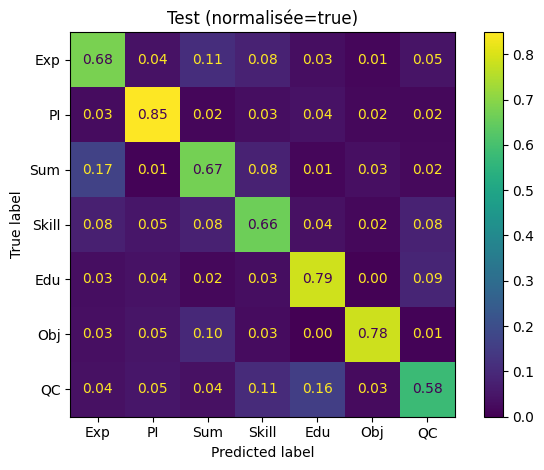

              precision    recall  f1-score   support

         Exp      0.929     0.678     0.784      3408
          PI      0.793     0.848     0.820       897
         Sum      0.467     0.671     0.551       580
       Skill      0.393     0.660     0.492       373
         Edu      0.722     0.788     0.754       594
         Obj      0.541     0.783     0.640       143
          QC      0.142     0.579     0.228        76

    accuracy                          0.713      6071
   macro avg      0.570     0.715     0.610      6071
weighted avg      0.792     0.713     0.736      6071



In [53]:
metrics_test, cm_test = evaluate_model(model, X_test, y_test, label_names=labels_names, title="Test")
print(metrics_test["classification_report"])